In this notebook I compare different regression models to predict column `salary_usd`	

In [321]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### How processed data looks like:

In [324]:
df = pd.read_csv("../data/processed_data.csv")
df.head()

,salary_usd,job_title,salary_local,experience_level,company_location,company_size,employee_residence,remote_ratio,education_required,years_experience,...,NLP,PyTorch,Python,R,SQL,Scala,Spark,Statistics,Tableau,TensorFlow
0,219728,122840.684494,219728,3.0,123530.217563,1.0,125832.356129,0,0.0,13,...,0,0,1,1,0,0,0,0,0,0
1,230237,120265.207778,25326070,3.0,131226.800122,2.0,129660.450729,50,1.0,10,...,0,0,1,0,0,0,0,0,1,0
2,128890,127497.966009,109557,3.0,122934.071493,0.0,123778.560219,100,1.0,12,...,0,1,0,0,0,1,1,0,0,0
3,96349,121180.102792,96349,1.0,116306.613681,2.0,117272.316709,50,3.0,2,...,0,0,1,0,0,0,0,0,1,0
4,63065,121027.372479,53605,0.0,114742.881553,0.0,115660.849752,100,0.0,0,...,0,0,1,1,1,1,0,0,0,0


Split data on train - test

In [327]:
from sklearn.model_selection import train_test_split

In [329]:
X = df.drop('salary_usd', axis = 1)
y = df['salary_usd']

In [331]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Raw data

In [287]:
df1 = pd.read_csv("../data/raw_data.csv")

In [289]:
X1 = df1.drop('salary_usd', axis = 1)
y1 = df1['salary_usd']

In [291]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.33, random_state=42)

### Model Preparation and Comparison

Next, I will prepare a modeling pipeline and compare the performance of the following algorithms:


- **Support Vector Machine (SVM)**
- **Random Forest**
- **Adaptive Boosting**
- **Gradient Boosting**


In [522]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [524]:
mses = {}

## Ensemble Models

In [527]:
def tree_pred(model, X_train, y_train, X_test): 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

### RandomForestRegressor

In [530]:
from sklearn.ensemble import RandomForestRegressor

In [532]:
rfr = RandomForestRegressor()

In [534]:
rfr_pred = tree_pred(rfr,X_train, y_train, X_test)

MSE: 

In [536]:
rfr_mse = mean_squared_error(y_test, rfr_pred)
rfr_mse

3782705.3573980397

In [537]:
mses['RandomForestRegressor'] = rfr_mse

### AdaBoost

In [539]:
from sklearn.ensemble import AdaBoostRegressor

In [540]:
def abr_pred(X_train, y_train, X_test): 
    abr = AdaBoostRegressor()
    abr.fit(X_train, y_train)
    y_pred = abr.predict(X_test)
    return y_pred

In [541]:
y_pred = abr_pred(X_train, y_train, X_test)
abr_mse = mean_squared_error(y_test, y_pred)
abr_mse

261844503.57163733

In [542]:
mses['AdaBoostRegressor'] = abr_mse

### GradientBoost

In [544]:
from sklearn.ensemble import GradientBoostingRegressor

In [545]:
gbr = GradientBoostingRegressor()

In [546]:
gbr_preds = rfr_pred = tree_pred(gbr,X_train, y_train, X_test)

In [547]:
gbr_mse = mean_squared_error(y_test, rfr_pred)
gbr_mse

48480351.94327863

In [548]:
mses['GradientBoostingRegressor'] = gbr_mse

### SVR

In [550]:
from sklearn.svm import SVR

Function that makes data standartization and svr model:

In [552]:
def svr_preds(X_train, y_train, X_test): 
    operations = [('scaler',StandardScaler()),('svr',SVR())]
    pipe = Pipeline(operations)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    return y_pred
    

In [553]:
y_pred_svr = svr_preds(X_train, y_train, X_test)

MSE:

In [555]:
svr_mse = mean_squared_error(y_test, y_pred_svr)
svr_mse

4317029667.6986885

In [556]:
mses['SVR'] = svr_mse

## MSE Visualization

In [507]:
def plot_mses(mses):
    width = np.arange(len(mses))
    ticks = list(mses.index)
    plt.barh(ticks, width, color = 'green')

In [509]:
mses

{'SVR': 4317029667.6986885,
 'AdaBoostRegressor': 280211910.96925604,
 'RandomForestRegressor': 3503852.4675681205,
 'GradientBoostingRegressor': 48483677.529936366}

In [511]:
mses_temp = pd.Series(mses).sort_values()

Text(0.5, 1.0, 'MSE Scores')

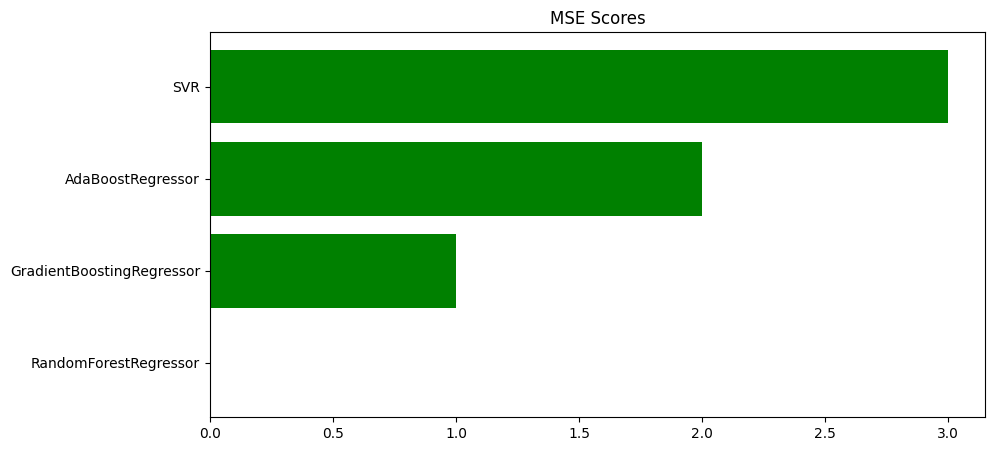

In [513]:
plt.figure(figsize = (10, 5))
plot_mses(mses_temp)

plt.title("MSE Scores")

## Turns out, `Random Forest` is the best model for this dataset